Saving can2.jpeg to can2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


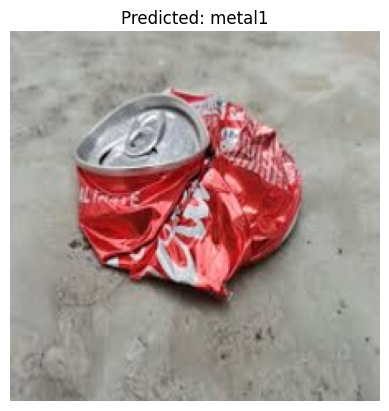

Predicted Class: metal1
Confidence Scores: [5.23610376e-02 1.15089433e-05 8.28399122e-01 9.39016843e-07
 1.76769114e-04 1.19050525e-01]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image


model = tf.keras.models.load_model("/content/glass_classification_model.h5")


class_labels = ['cardboard1', 'glass1', 'metal1', 'paper1', 'plastic1', 'trash1']


uploaded = files.upload()
file_name = list(uploaded.keys())[0]


img = Image.open(io.BytesIO(uploaded[file_name]))
img = img.resize((224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.show()

print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence Scores: {predictions[0]}")